In [1]:
import sys
sys.path.append('/Users/tanuj.jain/Documents/image-dedup/')

In [2]:
import os
import pickle
import numpy as np
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
with open('/Users/tanuj.jain/Documents/image-dedup/examples/returned_dict.pkl', 'rb') as f:
    returned_dict = pickle.load(f)

In [5]:
with open('/Users/tanuj.jain/Documents/dedup-data/Transformed_dataset/ground_truth_transformed.pkl', 'rb') as buf:
    correct_dict = pickle.load(buf)

# What is the distribution of number of retrievals (overall)

In [8]:
ret_count = [len(i) for i in list(returned_dict.values())]
hist_ret_count = np.bincount(ret_count)

In [44]:
hist_ret_count

array([   3, 2446,   67,   14,    4,    2,    4,    1,    2,    1,    0,
          2,    2,    1,    0,    1])

([<matplotlib.axis.XTick at 0x11dc55ac8>,
 <a list of 16 Text xticklabel objects>)

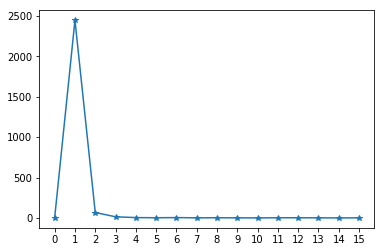

In [19]:
plt.plot(hist_ret_count, '*-')
plt.xticks(range(len(hist_ret_count)))

In [ ]:
# Which kind of transformation is usually caught the most (correctly and incorrectly)

In [23]:
def transformation_extractor(x):
    return x.split('.')[0].split('_')[1]

In [53]:
suffix_name_valid = []
suffix_name_invalid = []
correct_counter = 0
incorrect_counter = 0

for k, v in returned_dict.items():
    base_name = k.split('.')[0]
    b_name.append(base_name)
    for val in v:
        base_name_ret = val.split('.')[0].split('_')[0]
        transformation_name = transformation_extractor(val)
        if base_name_ret in base_name:
            suffix_name_valid.append(transformation_name)
            correct_counter += 1
        else:
            suffix_name_invalid.append(transformation_name)
            incorrect_counter += 1

In [54]:
correct_counter

2638

In [55]:
incorrect_counter

140

In [46]:
Counter(suffix_name_valid)

Counter({'resize': 2547,
         'cropped': 43,
         'vflip': 31,
         'hflip': 16,
         'rotation': 1})

In [38]:
Counter(suffix_name_invalid)

Counter({'cropped': 24,
         'rotation': 10,
         'resize': 30,
         'vflip': 52,
         'hflip': 24})

In [39]:
len(suffix_name_valid)

2638

In [40]:
len(suffix_name_invalid)

140

In [42]:
# How many times does each kind of transformation get missed?
# (There are 5 transformations per query, only some are caught)

In [59]:
transformation_caught = []
transformation_missed = []


for k in correct_dict.keys():
    retrs_corr = set(list(correct_dict[k]))
    retrs_ret = set(list(returned_dict[k]))
    
    common = retrs_corr.intersection(retrs_ret)
    missed = retrs_corr.difference(retrs_ret)
    
    if len(common) != 0:
        for c in list(common):
            transformation_caught.append(transformation_extractor(c))
    
    if len(missed) != 0:
        for m in list(missed):
            transformation_missed.append(transformation_extractor(m))

In [67]:
dict_tr_caught = Counter(transformation_caught)

In [68]:
dict_tr_caught

Counter({'resize': 2547,
         'cropped': 43,
         'vflip': 31,
         'hflip': 16,
         'rotation': 1})

In [69]:
dict_tr_missed = Counter(transformation_missed)

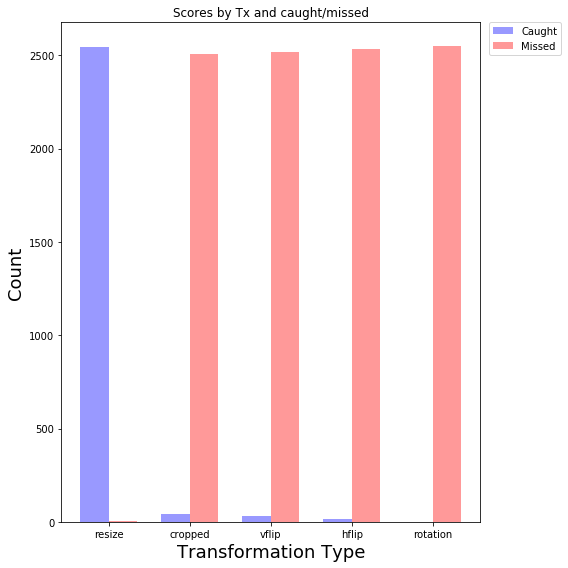

In [87]:
key_list = list(dict_tr_caught.keys())
tr_caught = [dict_tr_caught[i] for i in key_list]
tr_missed = [dict_tr_missed[i] for i in key_list]


fig, ax = plt.subplots(figsize=(8, 8))
n_groups = len(key_list)
index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, tr_caught, bar_width,
                alpha=opacity, color='b',
                label='Caught')

rects2 = ax.bar(index + bar_width, tr_missed, bar_width,
                alpha=opacity, color='r',
                label='Missed')

ax.set_xlabel('Transformation Type', fontsize = 18)
ax.set_ylabel('Count', fontsize = 18)
ax.set_title('Scores by Tx and caught/missed')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(key_list, fontsize = 10)
ax.legend(bbox_to_anchor = (1.01, 1.01))

fig.tight_layout()
plt.show()

In [ ]:
# Hamming distance
## What is the average hamming distance for correct retrievals?
## What is the average hamming distance for incorrect retrievals?
## Hamming distance on each transformation type? (whether correct or incorrect)

In [3]:
with open('/Users/tanuj.jain/Documents/image-dedup/examples/hamdists.pkl', 'rb') as f:
    hamdists = pickle.load(f)

In [5]:
len(hamdists)

2550

In [6]:
hamdists

{'4d5cb864982182a0': [0],
 'a480c2c0cccc6464': [0],
 'f0cc8e969e168c9c': [0],
 '2412141495353e20': [2],
 'd432331b83c3e3f8': [0],
 'f9797b7f2f775b1b': [0],
 'd9b9f0e0e0e0e0c8': [0],
 'ce9383818181c3c2': [0],
 'f0e0f0d1c960b080': [0],
 'c0b2b890d4d4b0c0': [1],
 'f398f97979f9f8f8': [2],
 'fcf0f8f8f8fcf8fc': [1, 4, 3],
 'f3b3d8cca49199d2': [0],
 'b160ca8c2c0c9cc9': [0],
 'f8faf474707c6662': [0],
 'f0733d3d41c80911': [2],
 'e8d06cb299e3d0e0': [0],
 '20280e1a0a1e16c2': [1],
 'e0e0e0e0e0ecf8f8': [4, 1],
 '96f8ca8c9c62e492': [2],
 '3cc1c0ccccfc7c82': [1],
 '216ee0f27076b6f8': [0],
 'e289a89098198183': [1],
 'f0d8989c0c8cf0f0': [2],
 'cc1e3e9d1c5d9f9e': [0],
 'fef4f87070108290': [0],
 'e0e0c693918e8c88': [0],
 'd0c0e060e080e080': [0],
 'c28cf0f1a1e1e0e6': [0],
 '61b0cece0c9ad8e8': [0],
 '833b391d595d9c08': [0],
 'e2cfb9b561719bca': [1],
 'faf6e6e6616160cc': [0],
 '8ca4aca496969696': [0],
 '60d2b129b1f1c789': [0],
 '7878317959717b7f': [1],
 'ececcdcddccce4f4': [0],
 'fcf8c8ca8b2963c2': [0],
 '6